In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [38]:
#URL of the dataset  
diamonds = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv"
diamonds 
df= pd.read_csv(diamonds)
df
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
#Observe the data by using the head function:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
#Count the number of rows and columns in the DataFrame using the shape function
df.shape

(53940, 10)

In [22]:
#cut, color, and clarity are ordinal variables with 5, 7, and 8 unique values
df.cut.unique()


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [23]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [40]:
#Summarize the columns using describe() to obtain the distribution of variables, 
# including mean, median, min, max, and the different quartiles:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
#Use include=object inside the describe function for categorical variables ( cut, color, clarity)
df.describe(include=object)


,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [28]:
#To obtain information on the dataset, use the info() method:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [41]:
#Adding new columns
#Add a price_per_carat column to the DataFrame
df['price per carat'] = df['price']/df['carat'] 
df['price per carat']

df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [54]:
#Use the np.where function from Python's numpy package:


#Apply a simple function on the columns using the following code: apply 13% tax
df['price']= df['price']*1.3
df.head()



,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
0,0.23,Ideal,E,SI2,61.5,55.0,715.0,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,715.0,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,717.6,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,733.2,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,735.8,4.34,4.35,2.75,1080.645161


In [53]:
df['price']= df['price'].apply(math.floor)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
0,0.23,Ideal,E,SI2,61.5,55.0,550,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,550,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,552,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,564,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,566,4.34,4.35,2.75,1080.645161


In [63]:
#to create a user-defined function to round off the price of the diamonds
# to the nearest multiple of 100

def get_100_multiple_ceil(x):
   y= math.ceil(x/100 * 100)
   return y

#df['rounded_price_to_100multiple']=df['price'].apply(get_100_multiple_ceil)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,715.0,3.95,3.98,2.43,1417.391304,715
1,0.21,Premium,E,SI1,59.8,61.0,715.0,3.89,3.84,2.31,1552.380952,715
2,0.23,Good,E,VS1,56.9,65.0,717.6,4.05,4.07,2.31,1421.739130,718
3,0.29,Premium,I,VS2,62.4,58.0,733.2,4.20,4.23,2.63,1151.724138,734
4,0.31,Good,J,SI2,63.3,58.0,735.8,4.34,4.35,2.75,1080.645161,736


In [64]:
# drop function to drop columns
df= df.drop(columns=['rounded_price_to_100multiple'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
0,0.23,Ideal,E,SI2,61.5,55.0,715.0,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,715.0,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,717.6,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,733.2,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,735.8,4.34,4.35,2.75,1080.645161


In [65]:
# creating a bar plot using specific feature

df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [66]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

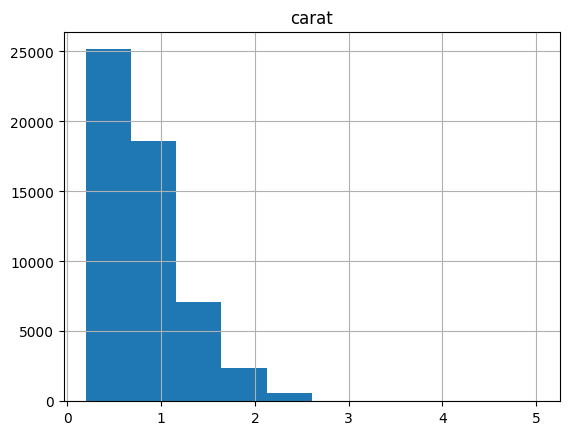

In [68]:
df = sns.load_dataset('diamonds')
df.hist(column='carat')

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

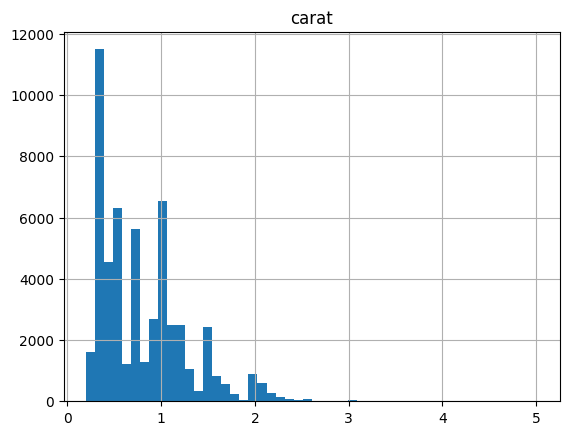

In [69]:
df.hist(column='carat', bins=50)

c:\Fatima Python Work\Python exercises\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Fatima Python Work\Python exercises\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


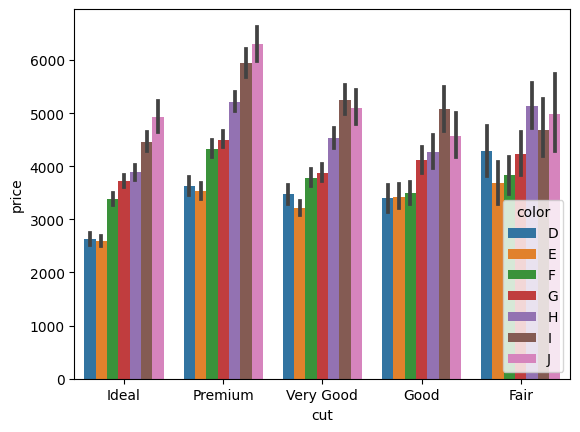

In [70]:
#use hue parameter to plot nested groups
ax = sns.barplot(x="cut", y="price", hue='color', data=df)

c:\Fatima Python Work\Python exercises\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Fatima Python Work\Python exercises\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


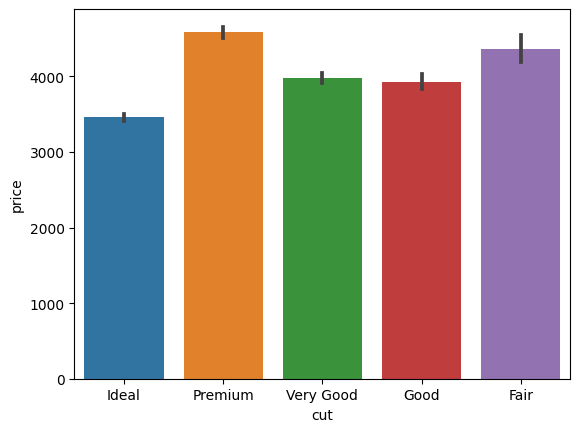

In [71]:
# use mean, median, mode

ax = sns.barplot(x="cut", y="price",  data=df, estimator= np.mean)

c:\Fatima Python Work\Python exercises\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Fatima Python Work\Python exercises\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


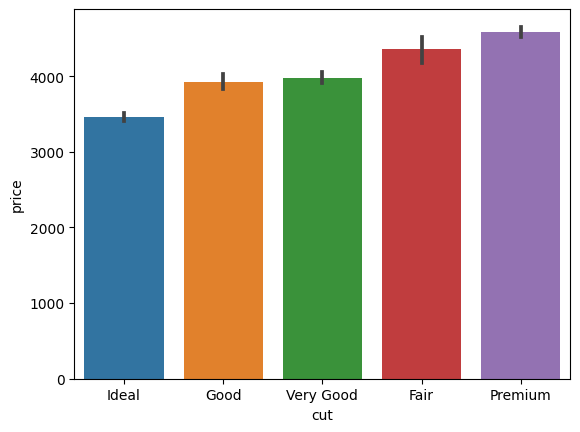

In [74]:
# reorder the x axis by using order parameter
ax = sns.barplot(x="cut", y="price",  data=df, estimator= np.mean,
                 order=['Ideal','Good','Very Good','Fair','Premium'])